In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Using scikit-learn we can download a set of 1797 images of handwritten digits 
# with the correct labels 0,1,…,9. The images have quite a low resolution: 8*8=64 pixels. 
# Let’s see how our machine learning method works with this kind of data.
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

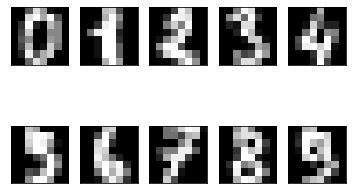

In [29]:
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, digits.data[:10]):  # 10 digits
    ax.imshow(digit.reshape(8,8), cmap="gray")      # size 64 px

In [30]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters = 10, random_state=0)
model.fit(digits.data)
model.cluster_centers_.shape

(10, 64)

In [31]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [32]:
from sklearn.metrics import accuracy_score
permutation3 = find_permutation(10, digits.target, model.labels_)
print(permutation3)
acc = accuracy_score(digits.target, [ permutation3[label] for label in model.labels_])
print("Accuracy score is", acc)

[4, 3, 1, 2, 9, 0, 7, 6, 5, 8]
Accuracy score is 0.7952142459654981
